ToDo:
Add category identifiers and constraingts, so that servings of spices or servings of animal products, etc are within bounds.

###### Imports & Data loading

In [1]:
import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpAffineExpression, \
LpConstraint, PULP_CBC_CMD
import numpy as np
import pulp as plp
import seaborn as sns
from notebooks_module.linear_programming import CorrelationCutoff,\
formulateMP, checkFeasibility, infeasibilitySearch
import matplotlib.pyplot as plt
import importlib
import notebooks_module.linear_programming

In [2]:
importlib.reload(notebooks_module.linear_programming)

<module 'notebooks_module.linear_programming' from '/Users/williammohr/DataScience/portfolio/Nutrition/03_Notebooks/notebooks_module/linear_programming.py'>

In [3]:
foods = pd.read_csv('../02_Data_formatted/nv_df.csv', index_col='Unnamed: 0')
constraints = pd.read_csv('../02_Data_formatted/constraints.csv', 
index_col = 'Unnamed: 0')

In [22]:
foods

,calories,protein,fat_total,saturated_fat,cholesterol,sodium,choline,folate,niacin,pantothenic_acid,...,biotin,chromium,cysteine_methionine,histidine,leucine,lysine,methionine,phenylalanine_tyrosine,threonine,valine
asparagus_cooked,39.60,4.32,0.40,0.09,0.0,25.20,46.98,268.20,2.82,0.40,...,0.72,0.0,0.12,0.10,0.25,0.20,0.06,0.25,0.17,0.22
avocado_cubed_raw,240.00,3.00,21.99,3.19,0.0,10.50,21.30,121.50,3.23,2.08,...,5.40,0.0,0.10,0.07,0.21,0.20,0.06,0.22,0.11,0.16
beet_greens_boiled,38.88,3.70,0.29,0.04,0.0,347.04,0.72,20.16,1.68,0.47,...,0.00,0.0,0.06,0.06,0.17,0.11,0.03,0.19,0.11,0.11
beets_sliced_cooked,74.80,2.86,0.31,0.05,0.0,130.90,10.71,136.00,1.13,0.25,...,0.00,0.0,0.06,0.04,0.12,0.10,0.03,0.15,0.08,0.10
bell_peppers_sliced_red_raw,28.52,0.91,0.28,0.02,0.0,3.68,5.15,42.32,1.08,0.29,...,0.00,0.0,0.03,0.02,0.03,0.03,0.01,0.06,0.04,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peppermint_leaves_fresh,5.32,0.28,0.07,0.02,0.0,2.36,0.00,8.66,0.20,0.03,...,0.00,0.0,0.00,0.01,0.02,0.01,0.00,0.02,0.01,0.01
rosemary_fresh,5.50,0.14,0.25,0.12,0.0,1.09,0.00,4.58,0.07,0.03,...,0.00,0.0,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01
sage_dried,4.41,0.15,0.18,0.10,0.0,0.15,0.61,3.84,0.08,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
thyme_fresh,4.85,0.27,0.08,0.02,0.0,0.43,0.00,2.16,0.18,0.02,...,0.00,0.0,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.01


In [4]:
constraints = constraints.sort_index()

In [5]:
constraints

,min,max
biotin,30.000,NaN
calcium,1000.000,2500.0
calories,2000.000,2000.0
carbohydrates,225.000,400.0
chloride,2.300,3.6
cholesterol,0.000,NaN
choline,550.000,3500.0
chromium,35.000,NaN
copper,0.900,10.0
cysteine_methionine,0.019,NaN


In [6]:
# identify amino acids
amino_acids = CorrelationCutoff(foods.corr()['phenylalanine_tyrosine'],.9)
amino_acids = [aa for aa in amino_acids if aa != 'protein']
# curate the constraints list: chloride provided by salt, 
# cholesterol guidelines are particular to each person,
# vitamin b12 is easily and safely supplemented
constraints.drop(index = [
    # 'fat_total','carbohydrates','protein',  'calories',
    'cholesterol','chloride','vitamin_b12'], inplace = True)

In [7]:
# Adjust amino acid requirements for bodyweight
usr_mass = input("How many kilos do you weigh?")
usr_mass = int(usr_mass)
constraints.loc[amino_acids,'min'] *= usr_mass

How many kilos do you weigh? 76


In [8]:
# categorize constraints for exclusions from mathematical model
foods_low_cal = foods[foods.calories<=15]
foods_substantial = foods.loc[[food for food in foods.index.values if 
                   food not in foods_low_cal.index],:]

categorize meats

In [9]:
3.19*9

28.71

In [10]:
foods[((foods.saturated_fat*9/foods.calories)>.05)&
(foods.cholesterol>0)&(foods.calcium!=0)].calcium

beef_grass_fed_strip_steak_cooked         10.21
chicken_pasture_raised_breast_roasted     17.01
lamb_grass_fed_lean_loin_roasted          20.41
cheese_grass_fed_cheddar_whole_milk      204.40
cow's_milk_grass_fed                     137.86
eggs_pasture_raised_large_hard_boiled     25.00
yogurt_grass_fed_whole_milk              296.45
salmon_wild_coho_broiled                  51.03
sardines_atlantic_canned                 346.54
Name: calcium, dtype: float64

Proposed categories: spice, herb, garnish

In [11]:
max_servings_by_category: {'Spices': 3}

In [12]:
# Adjust constraint values
constraints.loc['fat_total','min']=0
# constraints.loc['protein','min']=0
constraints.loc['chloride','max']=3100
constraints.loc['biotin','min'] = 40
constraints.loc['sodium','min'] = 0
constraints.loc['calories','min']=0
constraints.loc['carbohydrates','min']=0
constraints.loc['calcium','min']=0


In [13]:
servings_contraints = pd.DataFrame(columns = ['min','max'], index = foods.index)
servings_contraints.loc[:,['min','max']] = [0,3]

In [14]:
#  servings_contraints.loc['broccoli_chopped_cooked','min'] = 1
#  servings_contraints.loc['cauliflower_cooked','min'] = 1
#  servings_contraints.loc['carrots_sliced_raw','min'] = 1
# servings_contraints.loc['mushrooms_shiitake_cooked','min'] = 1
# servings_contraints.loc['olive_oil_cold_pressed_extra_virgin','min'] = 1
# # servings_contraints.loc['olives_black_canned','min'] = 1
# servings_contraints.loc['blueberries_fresh','min'] = 0
# servings_contraints.loc['oranges_fresh','min'] = 1
# servings_contraints.loc['garbanzo_beans_cooked','min'] = 1
# servings_contraints.loc['tempeh_cooked','min'] = 2
# servings_contraints.loc['kale_cooked','min'] = 1
# servings_contraints.loc['eggs_pasture_raised_large_hard_boiled','max'] = 0
# servings_contraints.loc['salmon_wild_coho_broiled','min'] = 1
 # servings_contraints.loc['bell_peppers_sliced_red_raw','min'] = 1

In [15]:
lp_formulation = formulateMP(foods,constraints,servings_contraints,integer=False)
lp_formulation.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/cdea9c275eaa43e9935a04bd67aa24a0-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/cdea9c275eaa43e9935a04bd67aa24a0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 64 COLUMNS
At line 6116 RHS
At line 6176 BOUNDS
At line 6294 ENDATA
Problem MODEL has 59 rows, 117 columns and 5934 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 52 (-7) rows, 117 (0) columns and 5133 (-801) elements
0  Obj 0 Primal inf 1500.0233 (32)
16  Obj 624.55306
Optimal - objective value 624.55306
After Postsolve, objective 624.55306, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 624.5530646 - 16 iterations time 0.002, Presolve 0

1

###### What do the loadings look like for the solution with the infeasible constraints removed?

###### Investigating failed constraints

In [16]:
def nutrient_contributions(food_servings,food_nutr_vals):
    """Args --> dict:food_servings
    DataFrame:food_nutr_vals
    For each nutrient determine the amount contributed by each food in the 
    meal/diet.  It is the servings of the food times the nutrient value per 
    serving of the food."""
    contributions = {}
    for nutrient in food_nutr_vals.columns:
        contributions[nutrient] = {}
        for food in food_servings.keys():
            contributions[nutrient][food] = food_servings[food]*\
            food_nutr_vals.loc[food,nutrient]
    return contributions
    

def constraint_factors(nutrient_total, constraints):
    nutrient_total = nutrient_total.loc[constraints.index]
    constraint_factors = pd.DataFrame(
        {'total':nutrient_total.values,
         'min_factor':nutrient_total.values/constraints['min'],
         'max_factor':nutrient_total.values/constraints['max']}, 
         index = nutrient_total.index)
    return constraint_factors

def diet_analytics(lp_formulation, foods, constraints):
    total_cals = 0
    food_servings = {}
    for v in lp_formulation.variables():
        total_cals += v.varValue*foods.at[v.name,'calories']
        food_servings[v.name] = v.varValue
    food_servings[v.name] = v.varValue
    # nonzero serving foods
    food_srv_dict = {food:srv for food,srv in food_servings.items() if srv != 0}
    nutrient_total = pd.Series(data=[0]*foods.shape[1], index=foods.columns)
    for food, srv in food_srv_dict.items():
        nutrient_total += foods.loc[food,:]*srv
    cf = constraint_factors(nutrient_total, constraints)

    # plot the factors of min, max constraint values for nutrients
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[20,10], 
                            layout='constrained')
    axs[0].set_yticks(range(len(cf.index)),cf.index)
    axs[0].set_title(
        'Multiple of Min Nutrient Val')
    axs[1].set_yticks(range(len(cf.index)), cf.index)
    axs[1].set_title(
        'Proportion of Max Nutrient Val')
    min_factors = [v if ~np.isinf(v) else 0 for v in cf.min_factor]
    max_factors = [v if ~np.isinf(v) else 0 for v in cf.max_factor]
    axs[0].barh(y=range(len(cf.index)), width = min_factors)
    axs[1].barh(y=range(len(cf.index)), width = max_factors)

    # plot the contributions for each nutrient by food
    ncols = int(len(cf.index)//(len(cf.index)**.5))
    nrows = int(ncols + np.ceil((len(cf.index)%ncols/ncols)))
    fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=[100,100], 
                            layout='constrained')
    food_list = list(food_srv_dict.keys())
    n_foods = len(food_list)
    food_servings = food_srv_dict.values()
    nutrient_vals = nutrient_contributions(food_srv_dict, foods)
    
    for i, n in enumerate(np.asarray(cf.index)):
        axs2[i//ncols][i%ncols].bar(x=range(n_foods), 
                        height=[nutrient_vals[n][food] for food in food_list])
        axs2[i//ncols][i%ncols].set_xticks(range(n_foods), food_list, 
                                           rotation = 45)
        axs2[i//ncols][i%ncols].set_title(f'Nutrient Contributions by Food for {n}')
    return cf, fig, fig2, food_srv_dict

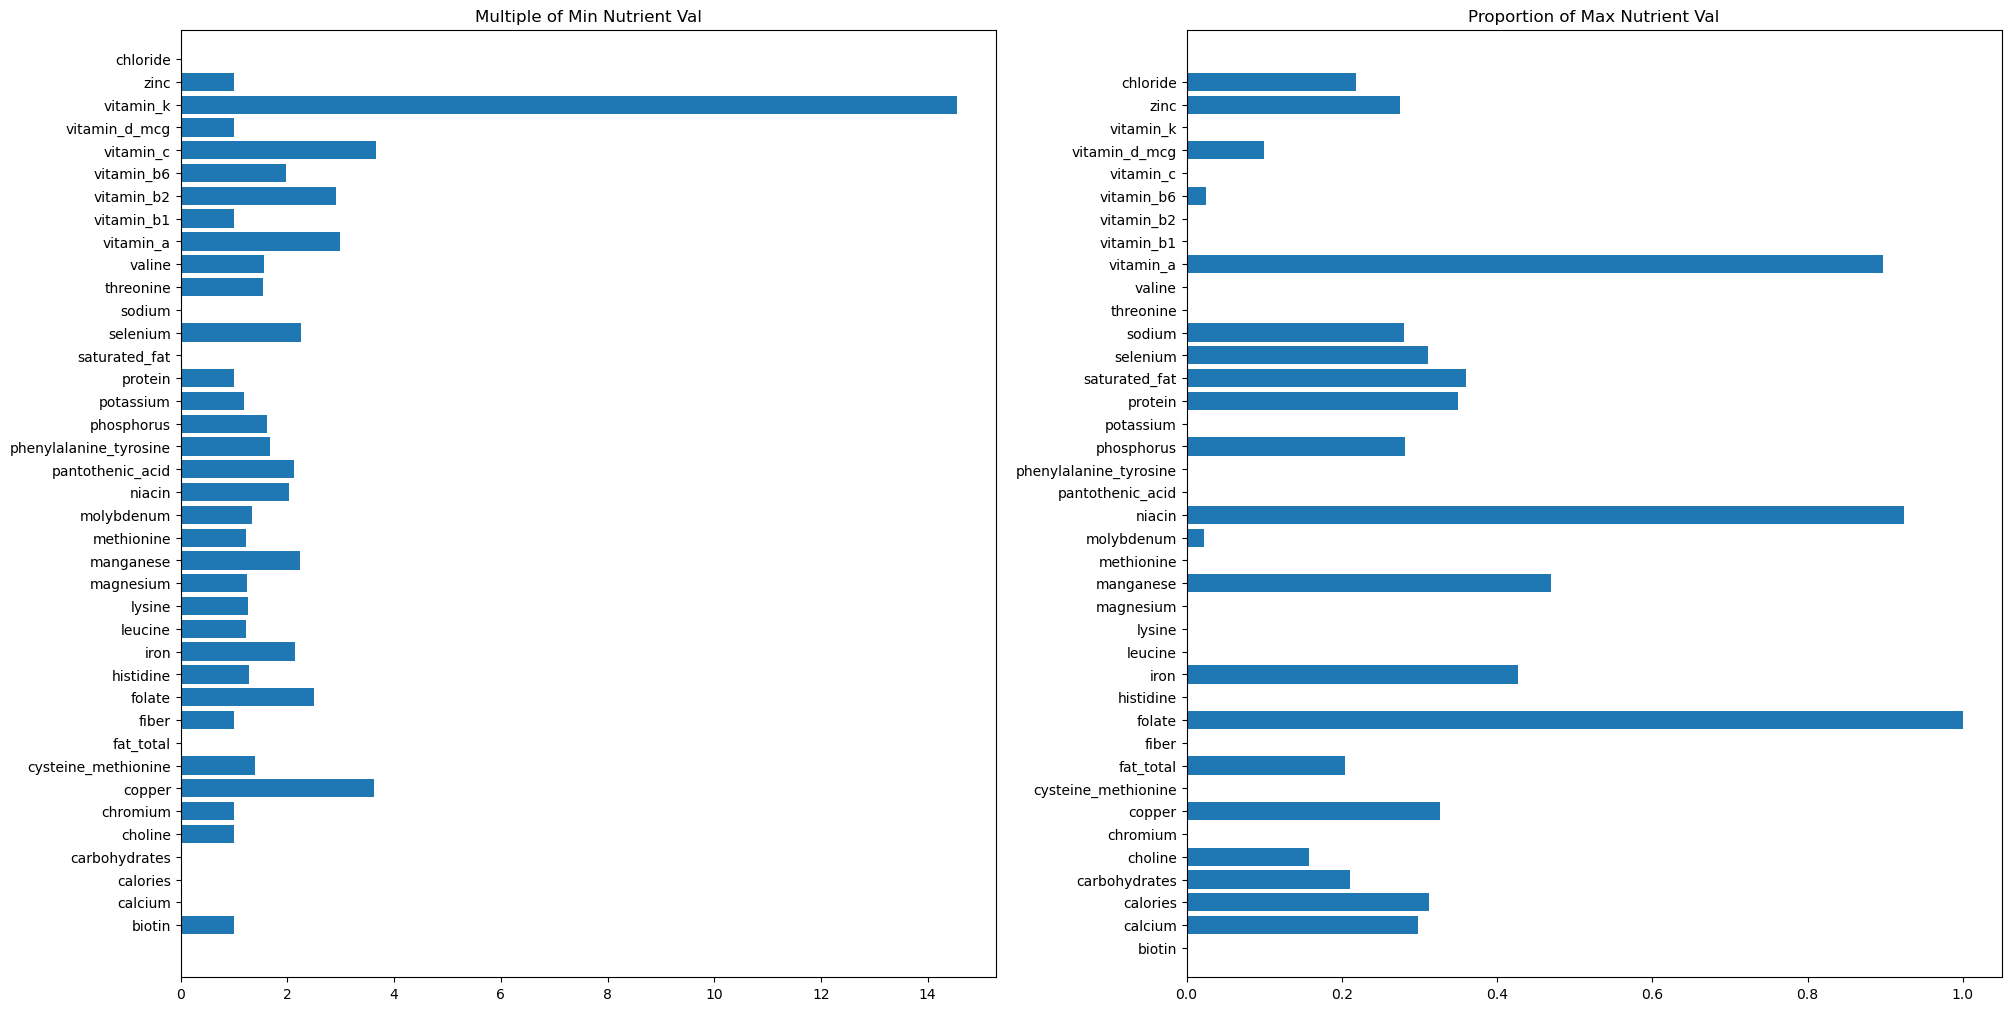

In [17]:
cf, fig, fig2, dict_foods = diet_analytics(lp_formulation, foods, constraints)

In [18]:
dict_foods

{'asparagus_cooked': 0.41247645,
 'basil_chopped_fresh': 3.0,
 'beef_grass_fed_strip_steak_cooked': 0.27803595,
 'beet_greens_boiled': 0.42578125,
 'broccoli_chopped_cooked': 1.6479882,
 'carrots_sliced_raw': 0.66209703,
 'eggs_pasture_raised_large_hard_boiled': 1.6269609,
 'mushrooms_crimini_raw': 3.0,
 'mushrooms_shiitake_cooked': 0.9012293,
 'salmon_wild_coho_broiled': 0.19833849,
 'sea_vegetables_dulse_dried': 3.0,
 'spinach_cooked': 0.82267125,
 'tomatoes_sliced_raw': 3.0}

In [19]:
fig2.savefig('./contributions.png')

In [20]:
nutrient_total = pd.Series(data = [0]*foods.shape[1], index = foods.columns)
for food, srv in dict_foods.items():
    foods.loc[food,:]
    nutrient_total += foods.loc[food,:]*srv
nutrient_total

calories                   624.553065
protein                     56.000000
fat_total                   15.921455
saturated_fat                4.325334
cholesterol                301.393580
sodium                     644.215728
choline                    549.999998
folate                    1000.000008
niacin                      32.328370
pantothenic_acid            10.587203
vitamin_b2                   3.208750
vitamin_b1                   1.200000
vitamin_a                 2691.358441
vitamin_b12                  2.629780
vitamin_b6                   2.562502
vitamin_c                  329.540413
vitamin_d_mcg                5.000000
vitamin_k                 1745.692190
calcium                    744.342837
copper                       3.260135
iron                        17.090589
magnesium                  397.963704
manganese                    5.157813
phosphorus                1125.359004
potassium                 5577.803897
selenium                   124.302248
zinc        

In [21]:
cf

,total,min_factor,max_factor
biotin,40.000000,1.000000,NaN
calcium,744.342837,inf,0.297737
calories,624.553065,inf,0.312277
carbohydrates,83.980299,inf,0.209951
choline,549.999998,1.000000,0.157143
chromium,35.000001,1.000000,NaN
copper,3.260135,3.622372,0.326013
cysteine_methionine,2.006200,1.389335,NaN
fat_total,15.921455,inf,0.204121
fiber,28.000000,1.000000,NaN


###### Plot contribution breakdown by food type for each nutrient